In [9]:
from __future__ import print_function
import sys, os, json, math
import numpy, scipy
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import PIL, cv2

import keras
from keras import *
import tensorflow as tf
import keras.backend as K
from keras.preprocessing  import utils
from keras.preprocessing.image import *
from keras_preprocessing import *
from keras_tqdm import *
from keras_applications import *
from keras_contrib import *
from keras.models import *
from keras.datasets import *
from keras.layers import *
from keras.preprocessing import *
from keras.optimizers import  *
from keras.losses import  *
from keras.metrics import  *
from keras.callbacks import  *
from keras.activations import  *
from keras.regularizers import  *

print(keras.__version__)
print(tf.__version__)

2.2.0
1.9.0


In [10]:
#############image data generator###########
img_rows, img_cols, img_ch = 256, 256, 3
batch_size =32
nepochs=20
dir_tr ='data/train/'
dir_val='data/val/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        dir_tr,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        dir_val,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='binary')

#######images and Labels###############
images, labels =next(train_generator)


Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


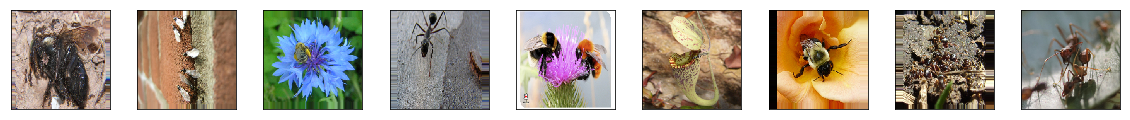

In [11]:
n = 9  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
############Model##################
input_img = Input(shape=(img_rows, img_cols, img_ch))

classifier = Sequential()
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu', 
                      input_shape = (img_rows, img_cols, img_ch)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))


classifier.summary()
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 64)      36928     
_________________________________________________________________
dropout_4 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
dropout_5 (Dropout)          (None, 61, 61, 128)       0         
__________

In [ ]:
history = classifier.fit_generator(
        train_generator,
        steps_per_epoch=((train_generator.samples))//batch_size,
        epochs=nepochs,verbose=1,
        validation_data=validation_generator,
        validation_steps= ((validation_generator.samples))// batch_size)

Epoch 1/20
7/7 [==============================] - 44s 6s/step - loss: 3.4133 - acc: 0.4914 - val_loss: 0.6943 - val_acc: 0.5391
Epoch 2/20
7/7 [==============================] - 46s 7s/step - loss: 0.6779 - acc: 0.5584 - val_loss: 0.6785 - val_acc: 0.5547
Epoch 3/20
7/7 [==============================] - 43s 6s/step - loss: 0.6430 - acc: 0.5856 - val_loss: 0.6912 - val_acc: 0.5312
Epoch 4/20
7/7 [==============================] - 49s 7s/step - loss: 0.6814 - acc: 0.5625 - val_loss: 0.6904 - val_acc: 0.6172
Epoch 5/20
7/7 [==============================] - 46s 7s/step - loss: 0.6475 - acc: 0.6486 - val_loss: 0.6554 - val_acc: 0.5781
Epoch 6/20
7/7 [==============================] - 45s 6s/step - loss: 0.6727 - acc: 0.6376 - val_loss: 0.6619 - val_acc: 0.5859
Epoch 7/20


In [ ]:
############Plot Accuracy and Loss over Epochs######
plt.plot(history.epoch,history.history['val_acc'],label='validation accuracy')
plt.plot(history.epoch,history.history['acc'],label='training accuracy')
plt.legend(loc=0)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

#############
plt.plot(history.epoch,history.history['val_loss'],label='validation loss')
plt.plot(history.epoch,history.history['loss'],label='training loss')
plt.legend(loc=0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()
